In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data= pd.read_csv("Loan_Data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.shape

(614, 13)

In [3]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

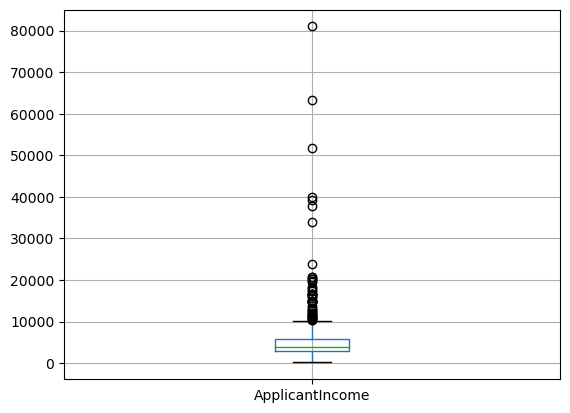

In [6]:
data.boxplot(column="ApplicantIncome")

<AxesSubplot:>

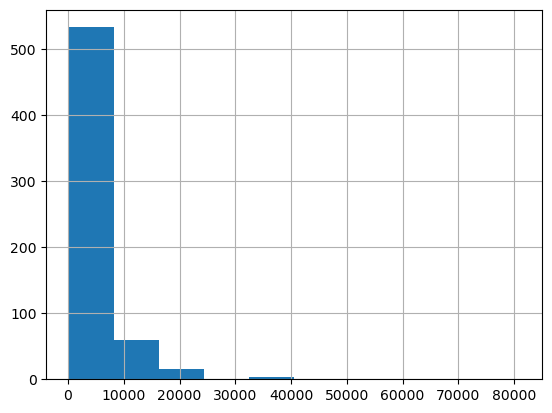

In [7]:
data["ApplicantIncome"].hist(bins=10)

In [8]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

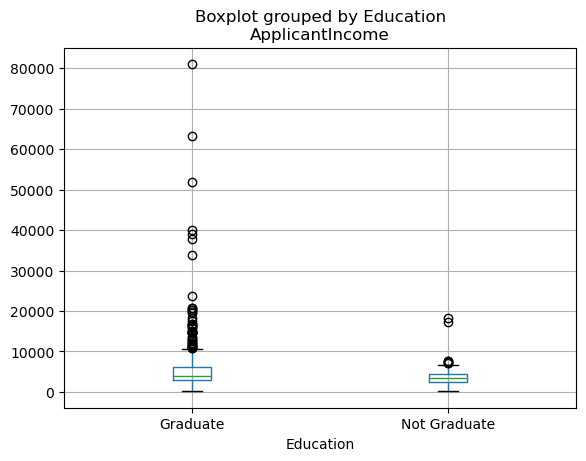

In [9]:
data.boxplot(column="ApplicantIncome",by="Education")

<AxesSubplot:>

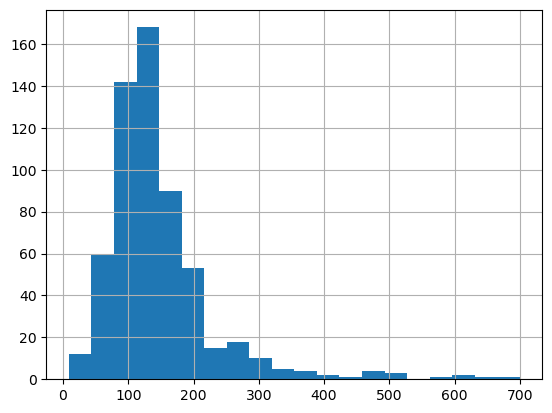

In [12]:
data["LoanAmount"].hist(bins=20)

<AxesSubplot:>

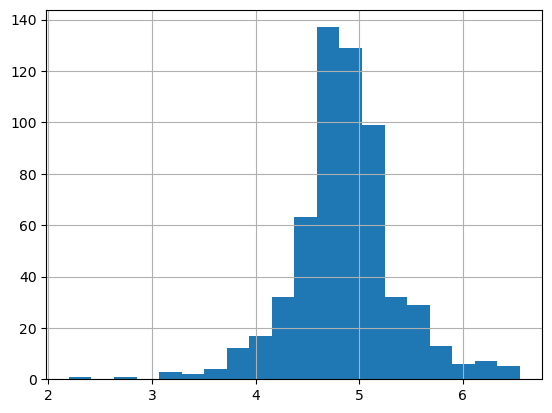

In [13]:
data["LoanAmount_log"]=np.log(data["LoanAmount"])
data["LoanAmount_log"].hist(bins=20)

In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [24]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)

In [25]:
data["Married"].fillna(data["Married"].mode()[0],inplace=True)

In [26]:
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)

In [27]:
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)

In [28]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)

In [20]:
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())
data.LoanAmount_log=data.LoanAmount_log.fillna(data.LoanAmount_log.mean())

In [29]:
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [30]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [31]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data["TotalIncome_log"]=np.log(data["TotalIncome"])

<AxesSubplot:>

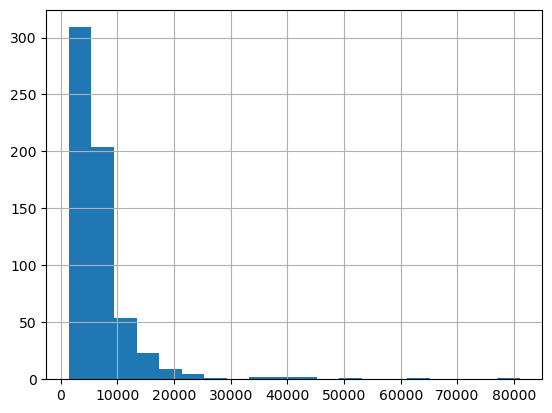

In [32]:
data["TotalIncome"].hist(bins=20)

In [38]:
X=data.iloc[:,np.r_[1:5,9:11,13:15]].values
y=data.iloc[:,12].values

In [39]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [36]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [46]:
for i in range (0,5):
    X_train[:,i]=label_encoder.fit_transform(X_train[:,i])

In [47]:
X_train[:,7]=label_encoder.fit_transform(X_train[:,7])

In [48]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [49]:
label_encoder_y= LabelEncoder()
y_train=label_encoder_y.fit_transform(y_train)

In [50]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [51]:
for i in range (0,5):
    X_test[:,i]=label_encoder.fit_transform(X_test[:,i])

In [52]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371

In [53]:
X_test[:,7]=label_encoder.fit_transform(X_test[:,7])

In [54]:
label_encoder_y= LabelEncoder()
y_test=label_encoder_y.fit_transform(y_test)

In [55]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
y_pred=dt.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [63]:
from sklearn import metrics
print("Accuracy of Decision Tree:",metrics.accuracy_score(y_pred,y_test))

Accuracy of Decision Tree: 0.7073170731707317


In [64]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)


GaussianNB()

In [65]:
y_pred = naive_bayes_classifier.predict(X_test)


In [66]:
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_pred,y_test))

Accuracy of Naive Bayes: 0.8292682926829268


In [67]:
data= pd.read_csv("Loan_Data_Test.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [73]:
data= pd.read_csv("Loan_Data_Test.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [72]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
